<a href="https://colab.research.google.com/github/sadra-kiaei/INSE-6220-project---Fall-2023-/blob/main/Principal_Component_Analysis_and_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.5 MB/s et

**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification.
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [4]:
#read cvs file into dataframe
df = pd.read_csv('/content/new_set.csv')
df.head(25)

Lung nodule masses  Density of nodule  \
0           203.825685         105.168876   
1           172.278038          75.010576   
2           147.704574          59.419642   
3           199.183091          95.200417   
4           182.772179         102.965750   
5           198.904864          98.419773   
6            85.503368          32.149932   
7           235.532768         120.008713   
8           197.880569         112.831433   
9           197.927734         102.467584   
10          210.841913          97.975907   
11          169.234870          75.493623   
12          187.568878          72.352807   
13          174.458195          88.389780   
14          226.302506          98.430674   
15          180.664097          78.324721   
16           81.762824          47.838612   
17          156.799748         102.704975   
18          189.432992          78.096958   
19          121.745564          67.495353   
20           60.726728          34.119405   
21           86.044205          34.923774   
22           42.181923          11.275543   
23          229.208571         108.145010   
24           61.063115          16.172399   

    level of carcinoembryonic antigen in blood  Mass of effusion  \
0                                    65.788935        170.957811   
1                                    59.677917        134.688493   
2                                    34.617937         94.037579   
3                                    68.343191        163.543608   
4                                    38.405893        141.371643   
5                                    51.456863        149.876636   
6                                    40.846783         72.996715   
7                                    90.061802        210.070515   
8                                    49.926390        162.757822   
9                                    65.477792        167.945376   
10                                   66.393491        164.369398   
11                                   91.347672        166.841295   
12                                   45.434214        117.787021   
13                                   87.603801        175.993581   
14                                   83.620962        182.051636   
15                                   71.289889        149.614610   
16                                   30.887866         78.726478   
17                                   80.144549        182.849524   
18                                   54.423547        132.520505   
19                                   36.787847        104.283200   
20                                   23.235899         57.355304   
21                                   36.403776         71.327550   
22                                   19.855963         31.131506   
23                                   59.813282        167.958292   
24                                   36.115927         52.288327   

    Density of pleural  Level of pro-gastrin-releasing peptide in blood  \
0           147.305251                                        79.415685   
1           109.443531                                        74.244650   
2           157.567604                                       102.763115   
3           138.950080                                        76.974791   
4           149.944316                                        54.095756   
5           166.144518                                        77.275339   
6            49.168006                                        49.140829   
7           166.348375                                        64.022868   
8           177.181233                                        57.747455   
9           138.507165                                        72.286736   
10          139.404775                                        92.527878   
11          103.095763                                       107.514342   
12          212.217689                                        88.976774   
13          13

In [5]:
len(df.index)

90

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Lung nodule masses                               90 non-null     float64
 1   Density of nodule                                90 non-null     float64
 2   level of carcinoembryonic antigen in blood       90 non-null     float64
 3   Mass of effusion                                 90 non-null     float64
 4   Density of pleural                               90 non-null     float64
 5   Level of pro-gastrin-releasing peptide in blood  90 non-null     float64
 6   Infected_lung                                    90 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 5.0 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

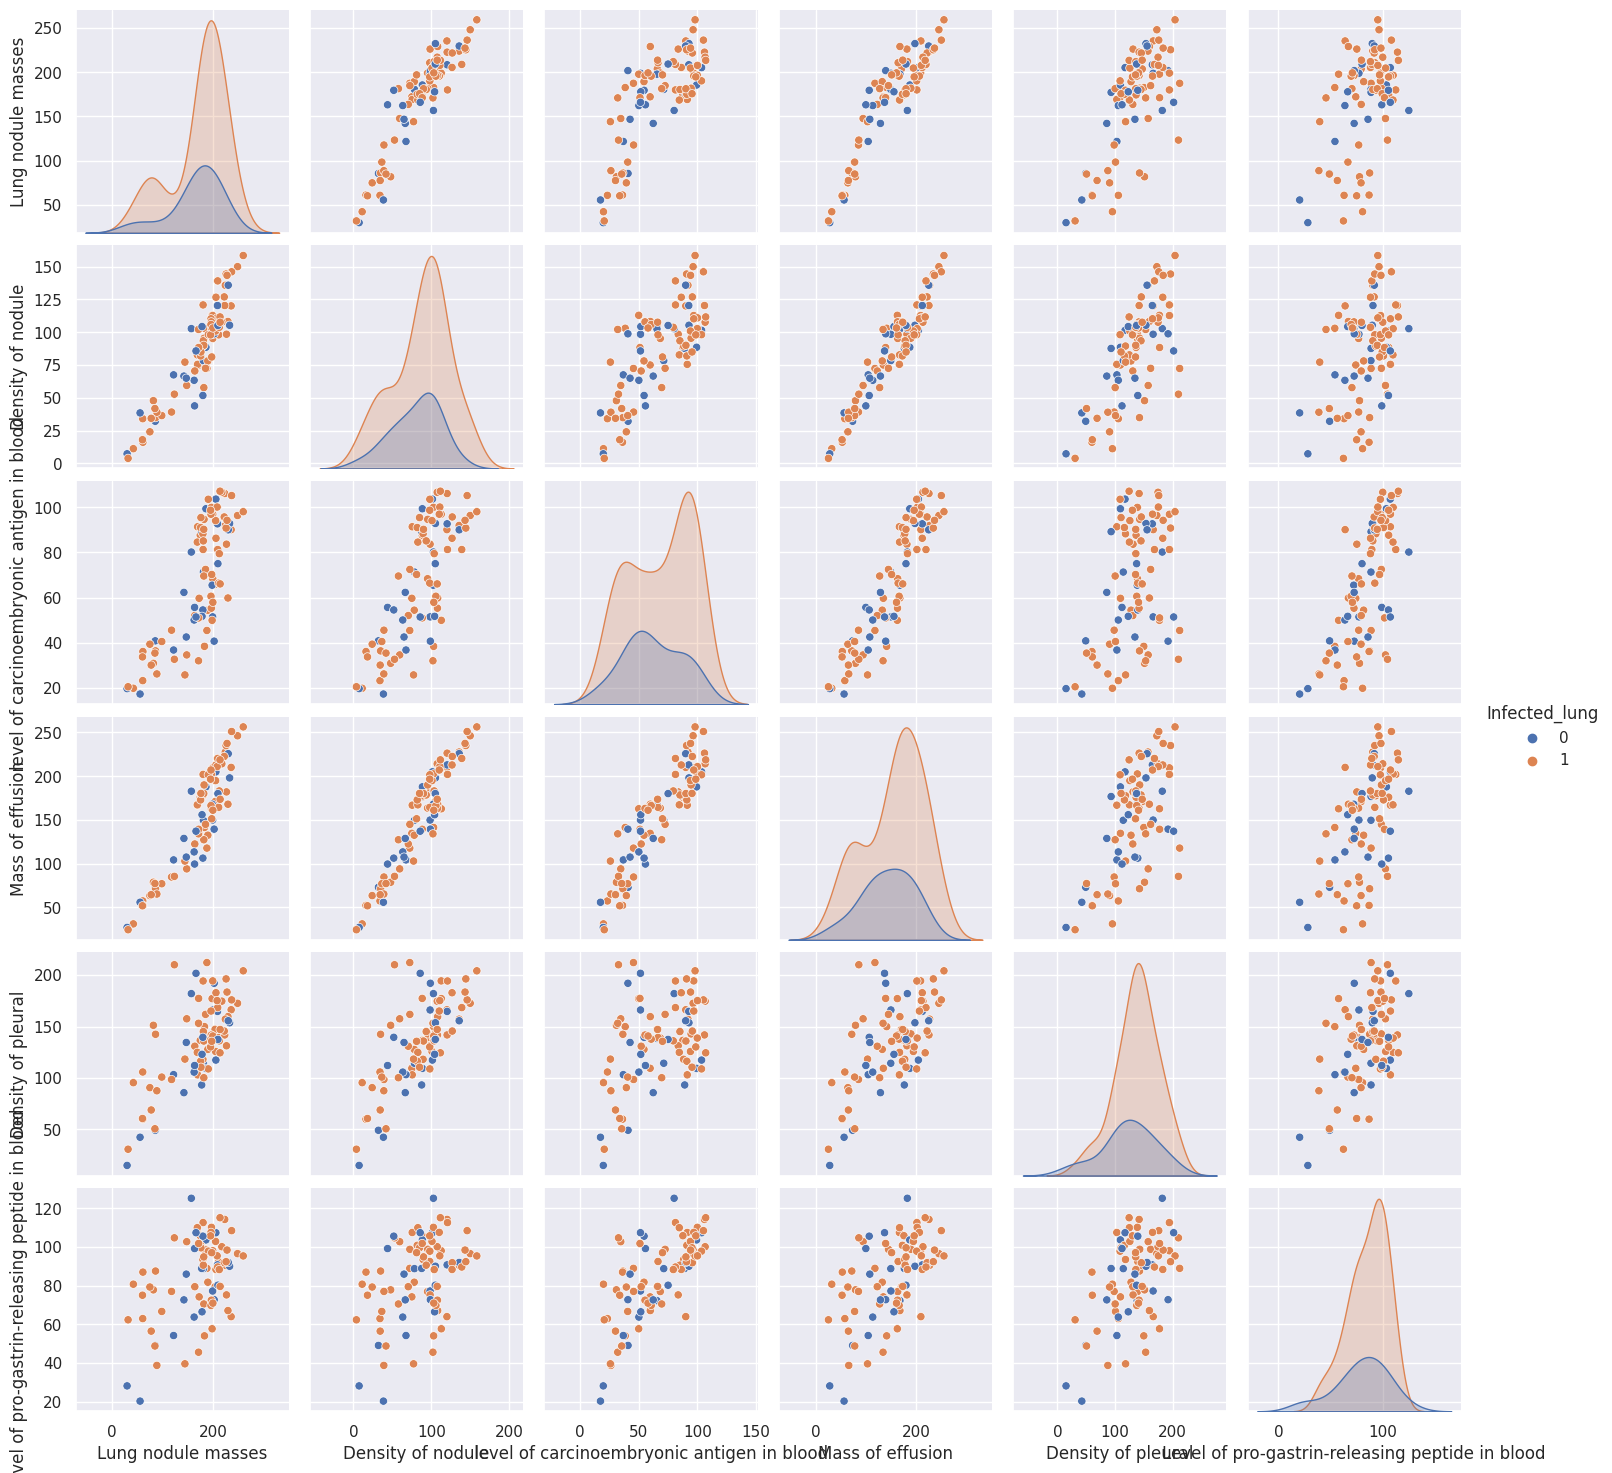

In [10]:
sns.pairplot(df, hue='Infected_lung')
plt.show()

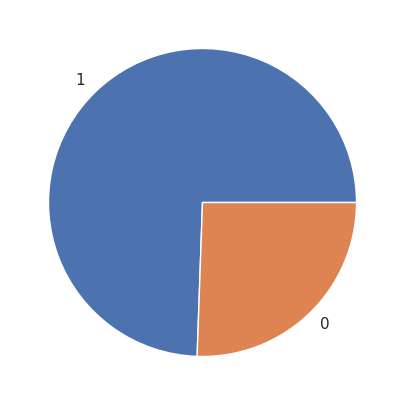

In [12]:
y =df['Infected_lung']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [13]:
X = df.drop(columns=['Infected_lung'])
X.head(10)

Lung nodule masses  Density of nodule  \
0          203.825685         105.168876   
1          172.278038          75.010576   
2          147.704574          59.419642   
3          199.183091          95.200417   
4          182.772179         102.965750   
5          198.904864          98.419773   
6           85.503368          32.149932   
7          235.532768         120.008713   
8          197.880569         112.831433   
9          197.927734         102.467584   

   level of carcinoembryonic antigen in blood  Mass of effusion  \
0                                   65.788935        170.957811   
1                                   59.677917        134.688493   
2                                   34.617937         94.037579   
3                                   68.343191        163.543608   
4                                   38.405893        141.371643   
5                                   51.456863        149.876636   
6                                   40.846783         72.996715   
7                                   90.061802        210.070515   
8                                   49.926390        162.757822   
9                                   65.477792        167.945376   

   Density of pleural  Level of pro-gastrin-releasing peptide in blood  
0          147.305251                                        79.415685  
1          109.443531                                        74.244650  
2          157.567604                                       102.763115  
3          138.950080                                        76.974791  
4          149.944316                                        54.095756  
5          166.144518                                        77.275339  
6           49.168006                                        49.140829  
7          166.348375                                        64.022868  
8          177.181233                                        57.747455  
9          138.507165                                        72.286736

In [14]:
X.describe().transpose()

count        mean        std  \
Lung nodule masses                                90.0  170.942323  53.799936   
Density of nodule                                 90.0   85.926855  35.082745   
level of carcinoembryonic antigen in blood        90.0   67.025774  26.497524   
Mass of effusion                                  90.0  152.952629  57.670068   
Density of pleural                                90.0  134.257895  40.752236   
Level of pro-gastrin-releasing peptide in blood   90.0   84.349024  20.614003   

                                                       min         25%  \
Lung nodule masses                               29.811068  158.186678   
Density of nodule                                 3.923990   65.360862   
level of carcinoembryonic antigen in blood       17.304892   43.268953   
Mass of effusion                                 24.448911  108.984688   
Density of pleural                               15.003487  109.703873   
Level of pro-gastrin-releasing peptide in blood  20.366537   72.557972   

                                                        50%         75%  \
Lung nodule masses                               182.379635  205.479644   
Density of nodule                                 94.320501  107.132178   
level of carcinoembryonic antigen in blood        67.368341   91.258428   
Mass of effusion                                 165.393925  197.700734   
Density of pleural                               138.133208  161.306162   
Level of pro-gastrin-releasing peptide in blood   88.871511   99.118346   

                                                        max  
Lung nodule masses                               259.440855  
Density of nodule                                158.377995  
level of carcinoembryonic antigen in blood       107.080649  
Mass of effusion                                 256.384378  
Density of pleural                               212.217689  
Level of pro-gastrin-releasing peptide in blood  125.196741

**Standardize the Data**

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Lung nodule masses  Density of nodule  \
0            0.614640           0.551548   
1            0.024967          -0.312901   
2           -0.434349          -0.759796   
3            0.527863           0.265815   
4            0.221118           0.488398   
5            0.522662           0.358094   
6           -1.596983          -1.541447   
7            1.207293           0.976913   
8            0.503517           0.771186   
9            0.504398           0.474119   

   level of carcinoembryonic antigen in blood  Mass of effusion  \
0                                   -0.046939          0.313959   
1                                   -0.278857         -0.318475   
2                                   -1.229903         -1.027311   
3                                    0.049997          0.184677   
4                                   -1.086147         -0.201940   
5                                   -0.590853         -0.053637   
6                                   -0.993514         -1.394204   
7                                    0.874236          0.995974   
8                                   -0.648935          0.170975   
9                                   -0.058747          0.261431   

   Density of pleural  Level of pro-gastrin-releasing peptide in blood  
0            0.321957                                        -0.240661  
1           -0.612319                                        -0.492917  
2            0.575190                                         0.898285  
3            0.115784                                        -0.359733  
4            0.387078                                        -1.475830  
5            0.786834                                        -0.345072  
6           -2.099678                                        -1.717543  
7            0.791865                                        -0.991560  
8            1.059176                                        -1.297691  
9            0.104855                                        -0.588428

In [16]:
X.describe().transpose()

count          mean  \
Lung nodule masses                                90.0  3.774758e-16   
Density of nodule                                 90.0  2.140263e-16   
level of carcinoembryonic antigen in blood        90.0  5.097774e-16   
Mass of effusion                                  90.0 -3.281326e-16   
Density of pleural                                90.0  6.707597e-16   
Level of pro-gastrin-releasing peptide in blood   90.0  8.092292e-16   

                                                      std       min       25%  \
Lung nodule masses                               1.005602 -2.637957 -0.238422   
Density of nodule                                1.005602 -2.350508 -0.589498   
level of carcinoembryonic antigen in blood       1.005602 -1.886947 -0.901590   
Mass of effusion                                 1.005602 -2.240740 -0.766676   
Density of pleural                               1.005602 -2.942722 -0.605895   
Level of pro-gastrin-releasing peptide in blood  1.005602 -3.121225 -0.575197   

                                                      50%       75%       max  
Lung nodule masses                               0.213781  0.645555  1.654172  
Density of nodule                                0.240593  0.607824  2.076720  
level of carcinoembryonic antigen in blood       0.013001  0.919649  1.520115  
Mass of effusion                                 0.216941  0.780280  1.803556  
Density of pleural                               0.095627  0.667443  1.923736  
Level of pro-gastrin-releasing peptide in blood  0.220618  0.720484  1.992653

**Observations and variables**

In [17]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

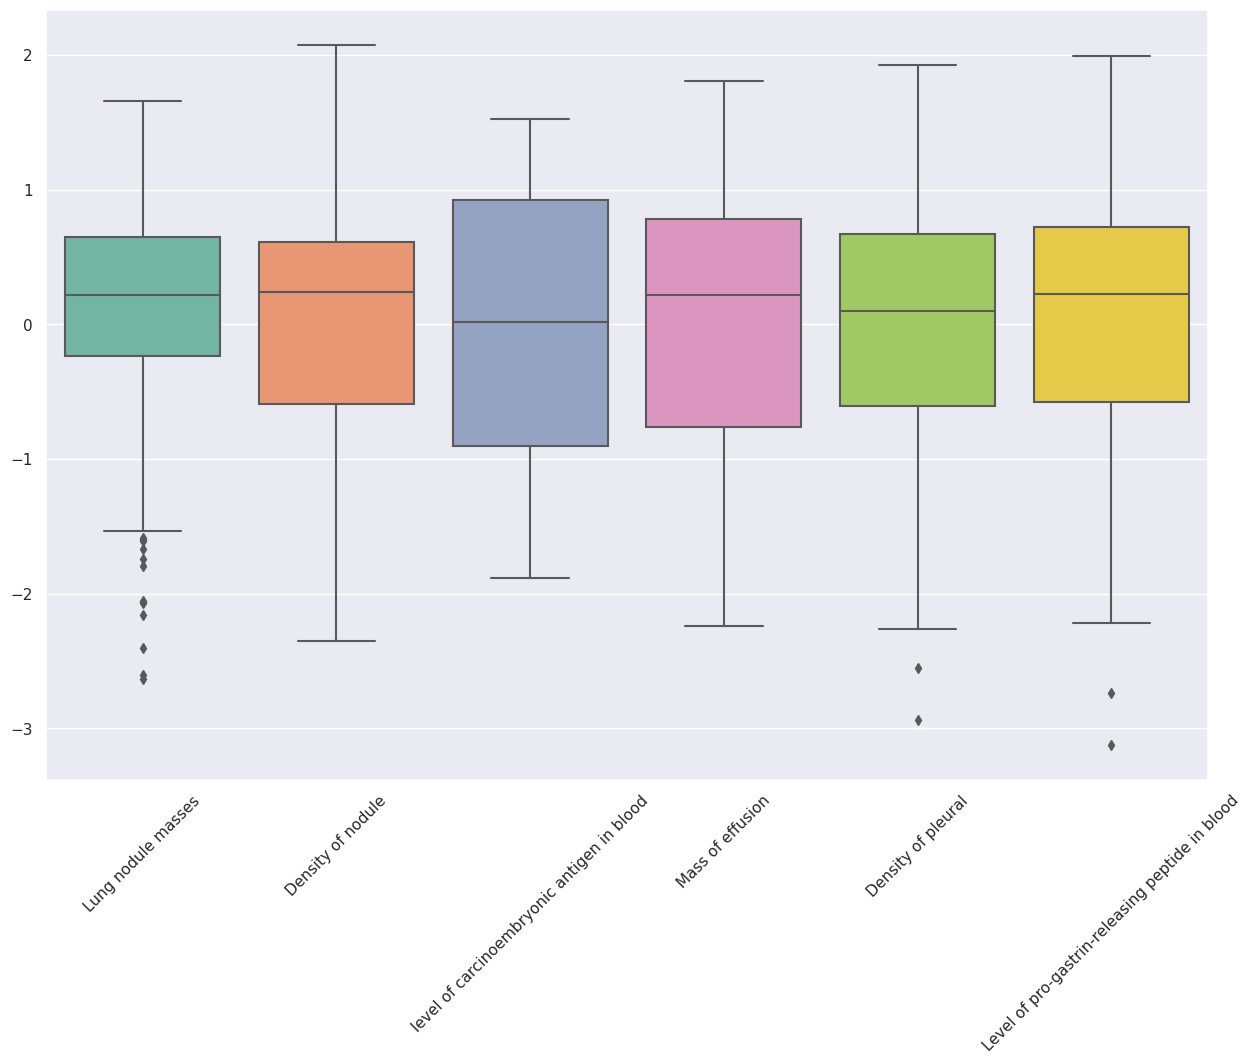

In [18]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


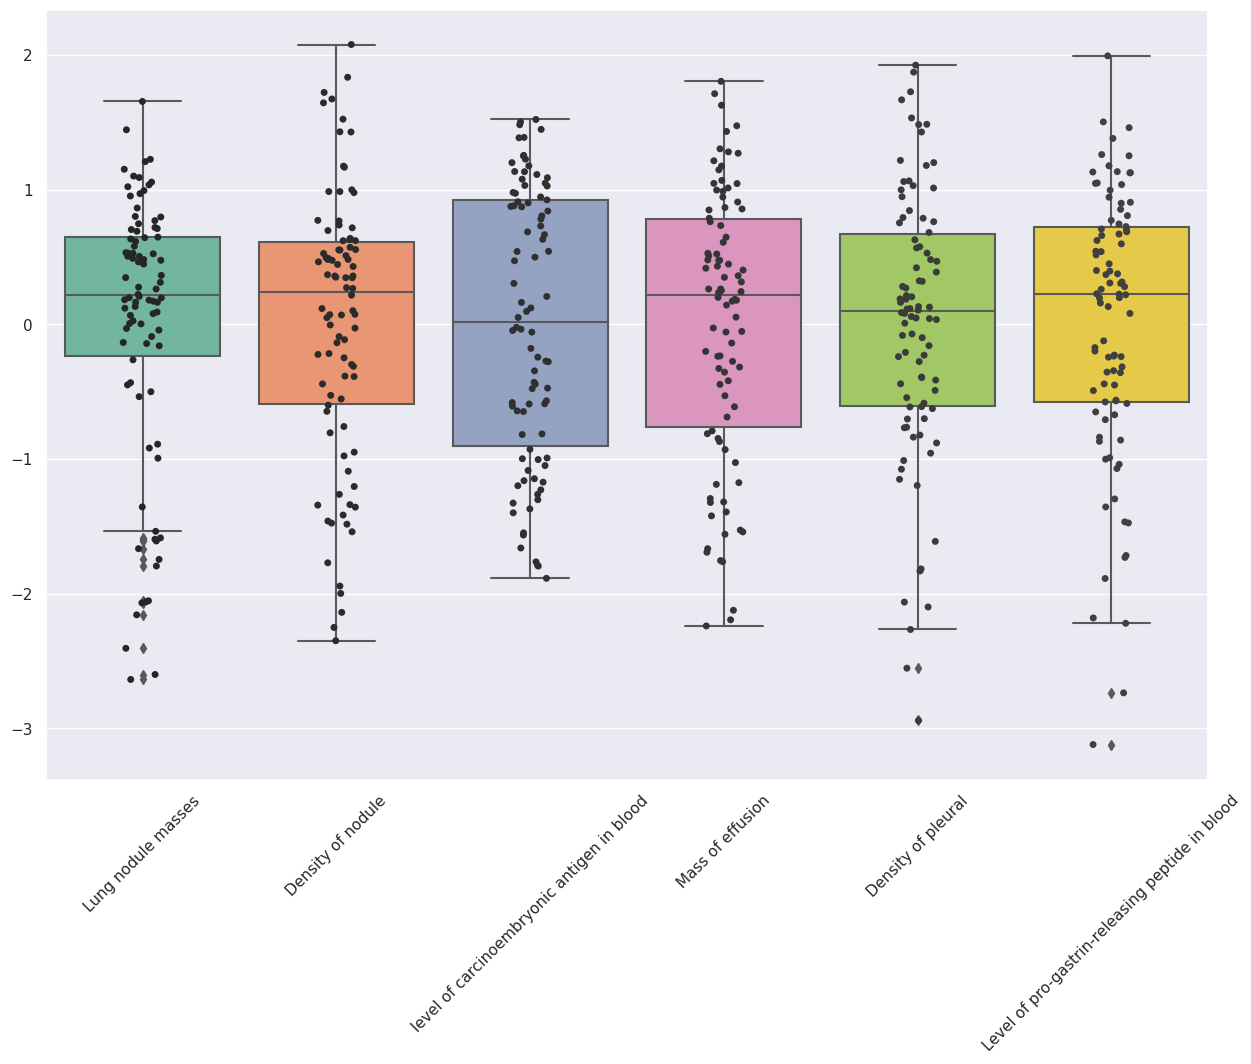

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

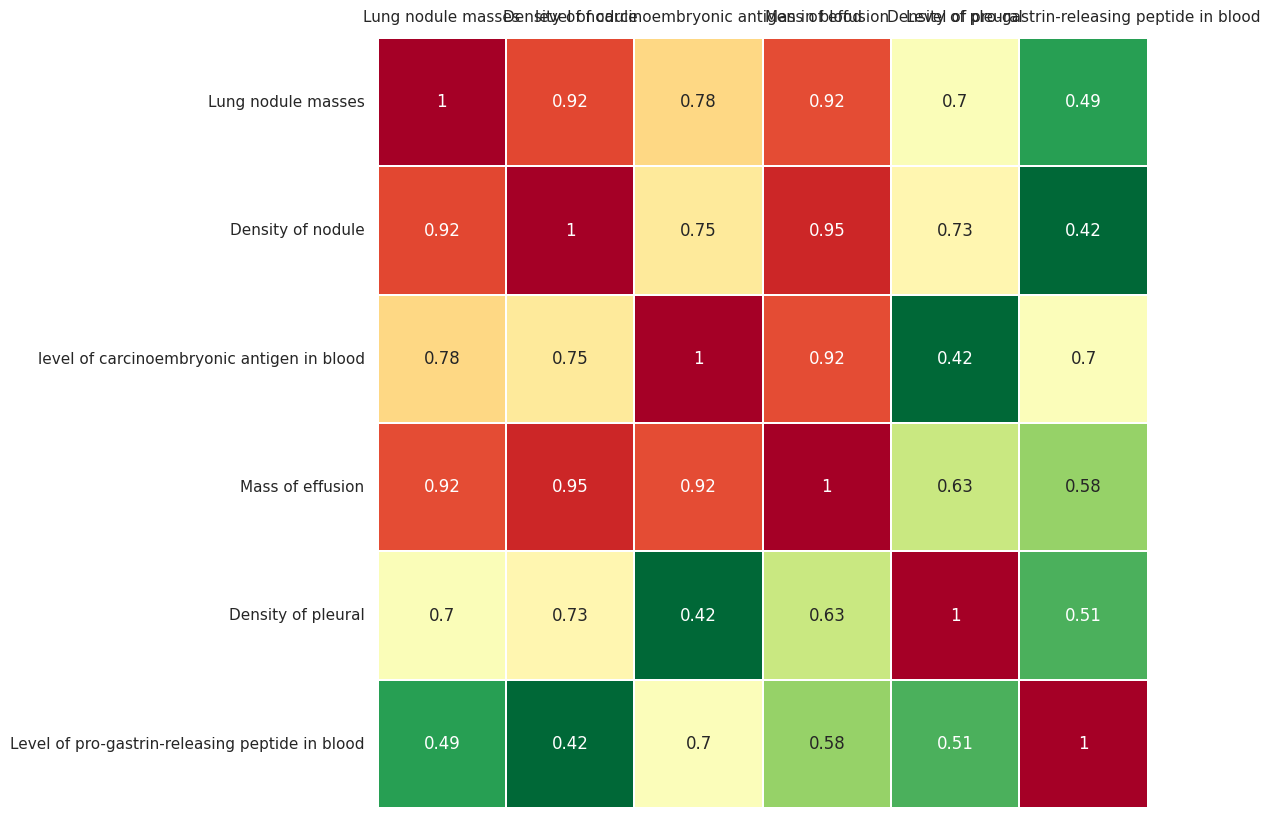

In [20]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

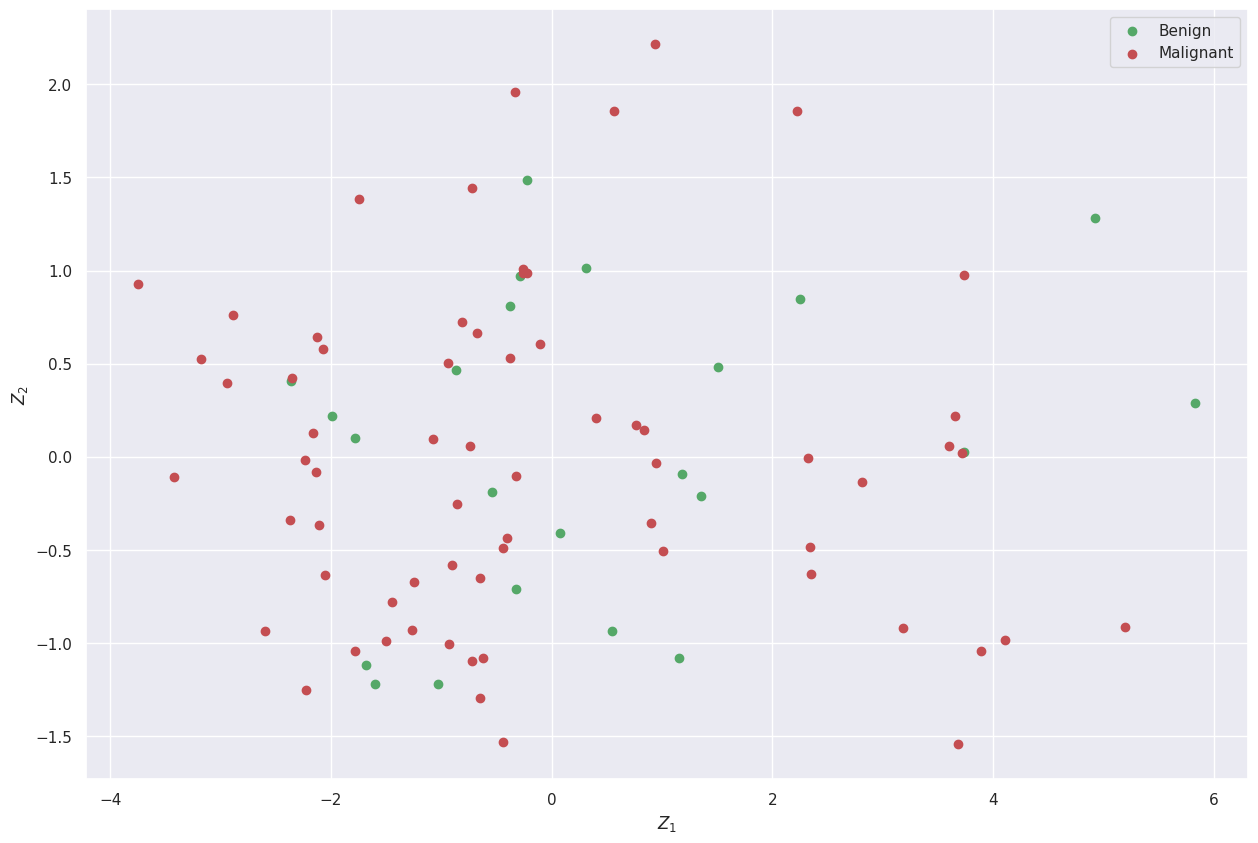

In [21]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-4.40384967e-01,  2.48807891e-01, -1.09497665e-01,
         8.55525176e-01,  1.55772318e-02,  1.22737566e-10],
       [-4.38622793e-01,  3.56933486e-01, -1.23567402e-01,
        -3.35126105e-01, -5.64431129e-01, -4.83784688e-01],
       [-4.15685849e-01, -3.60004578e-01, -4.14180616e-01,
        -1.73251130e-01,  6.02101464e-01, -3.65396044e-01],
       [-4.57823931e-01,  5.17248675e-02, -2.65472972e-01,
        -2.83472348e-01, -6.67173740e-02,  7.95259773e-01],
       [-3.56687900e-01,  3.00546443e-01,  7.64219611e-01,
        -1.80615053e-01,  4.07175842e-01, -2.19211954e-10],
       [-3.22563779e-01, -7.66867783e-01,  3.82999038e-01,
         1.13017010e-01, -3.85234089e-01,  2.59341201e-10]])

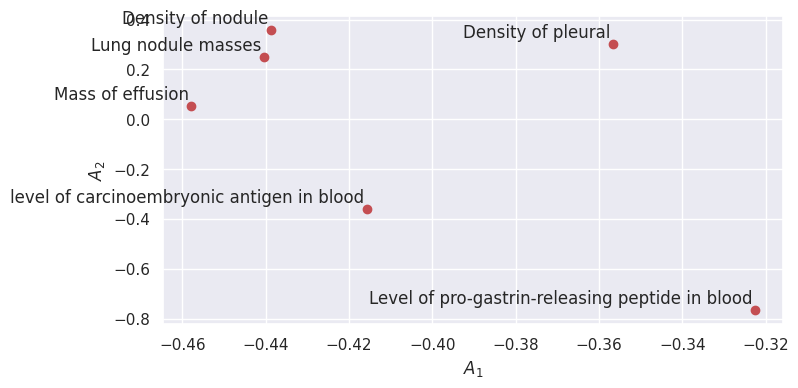

In [22]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


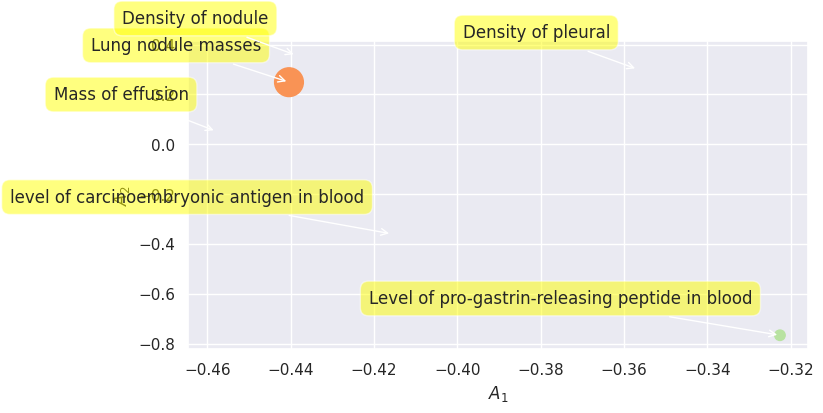

In [23]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.57532767e+00, 7.45660072e-01, 5.99805147e-01, 9.63732013e-02,
       5.02496409e-02, 3.93509591e-19])

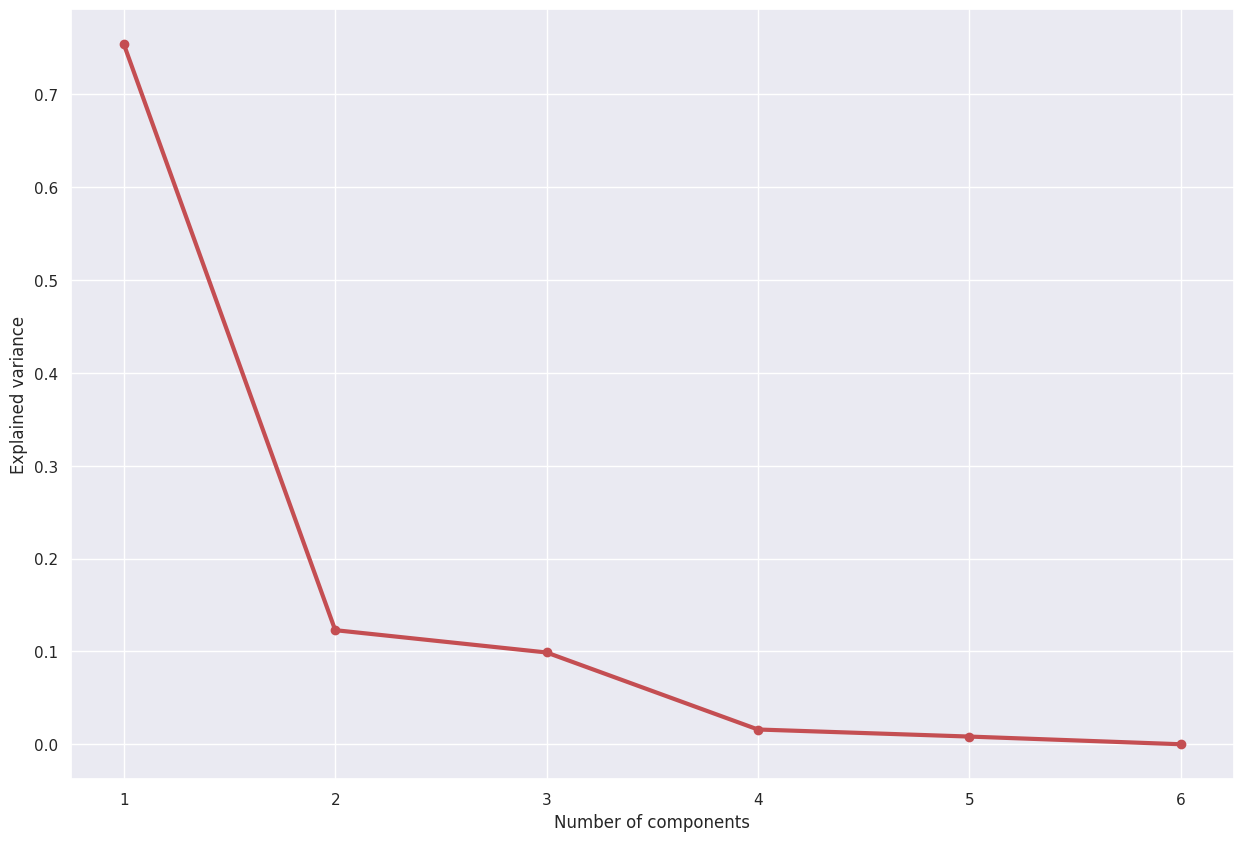

In [24]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

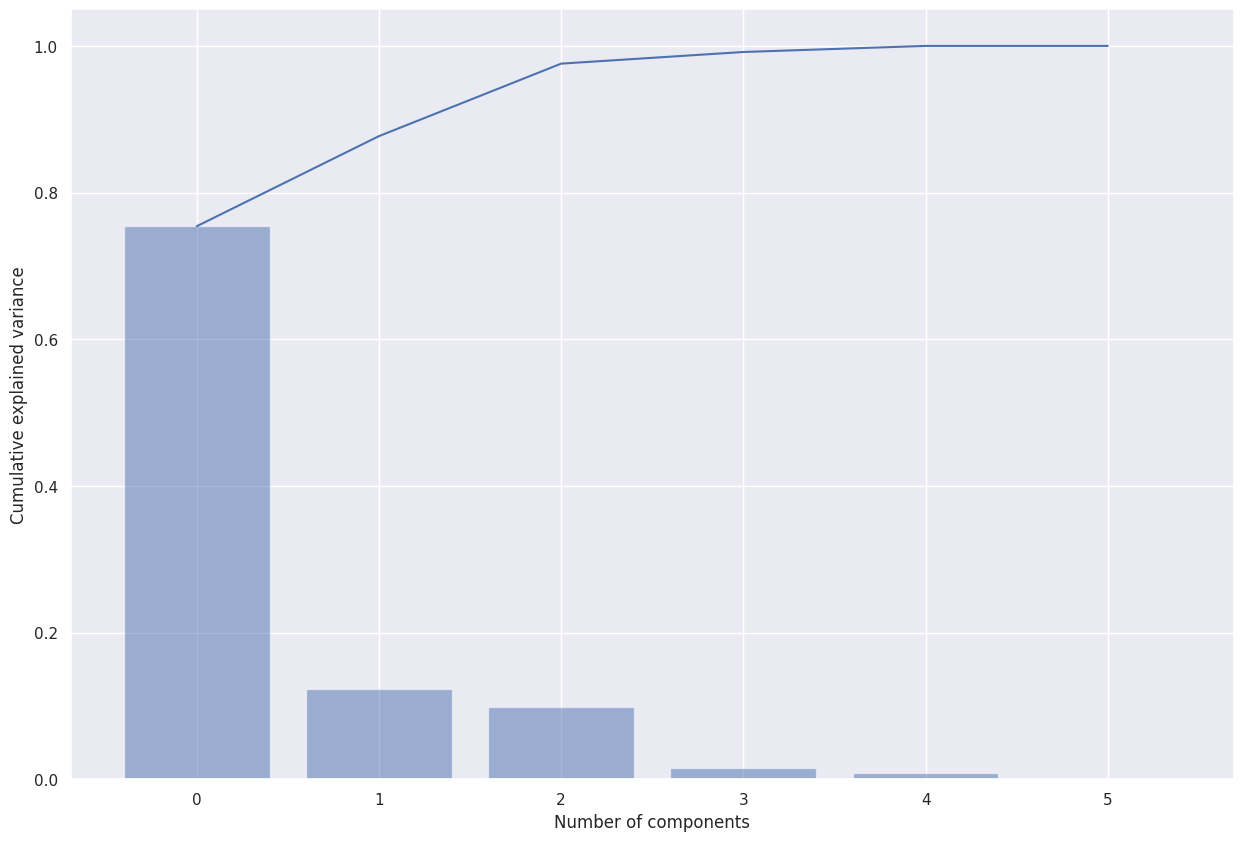

In [25]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([ 0.66424871,  0.1724151 , -0.50562702,  0.52843438,  1.8580155 ,
        0.96889825,  0.024096  ,  1.38425274,  1.95649304,  0.8121595 ,
        0.05996914, -1.53216911,  0.60677271, -1.00616243,  0.50307516,
       -0.40905196, -0.00887691, -1.22024656,  0.20657705,  0.84763798,
        0.05675092, -0.6316351 , -0.98258454,  1.4421714 , -1.54437495,
        1.48433836, -0.48605646, -0.93675293, -0.91772254,  0.28786205,
        0.14159896, -0.13755785, -0.709183  ,  0.48227446, -0.01906967,
       -0.36436066,  1.28214534, -0.49049961, -0.91261245, -1.04524701,
       -0.03250187,  0.97351635,  0.42113412,  2.21560035, -1.22276764,
       -1.29850829, -0.67375338,  0.21626701, -1.12098058,  0.52465265,
       -0.65381045, -0.25616652,  0.10317336,  0.40728537,  0.12853111,
       -0.34081017,  0.57774105, -1.04556153,  0.92824605, -0.93318411,
       -1.08196188,  0.6412285 , -0.10621116,  1.85958471, -0.77811417,
        0.75862149, -0.08335785, -0.63616522, -0.99040702, -0.35

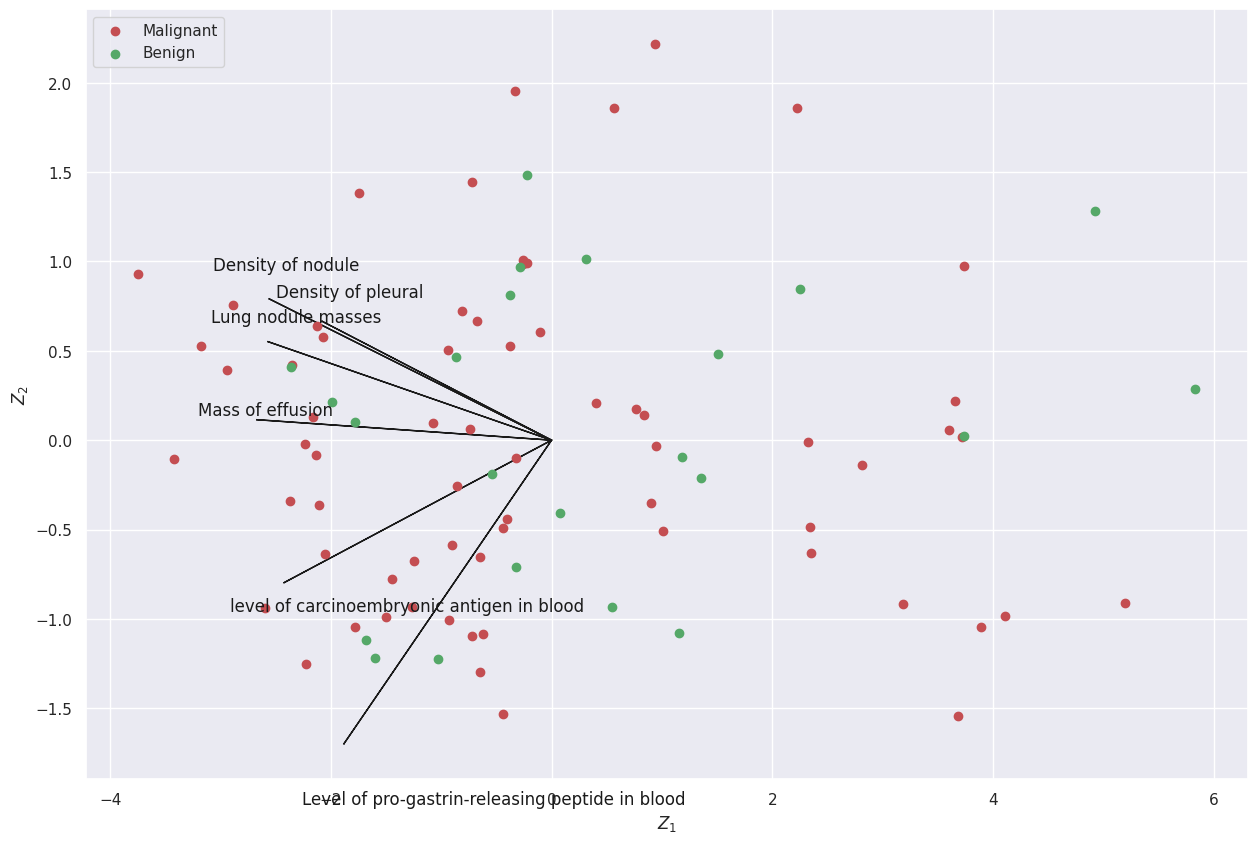

In [26]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [27]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.7 MB/s eta 0:00:00


In [28]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [29]:
out['PC']

PC1       PC2       PC3
0  -0.674036  0.664249 -0.045489
1   0.765377  0.172415 -0.420759
2   1.011208 -0.505627  1.707186
3  -0.379650  0.528434 -0.209673
4   0.570332  1.858015  0.149480
..       ...       ...       ...
85 -0.813645  0.723987 -0.088963
86  1.358098 -0.212542 -0.819618
87  1.182715 -0.092304  0.754990
88  3.660488  0.219874 -1.060762
89 -0.404904 -0.438650  0.185364

[90 rows x 3 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (75.4% expl.var)', ylabel='PC2 (12.2% expl.var)'>)

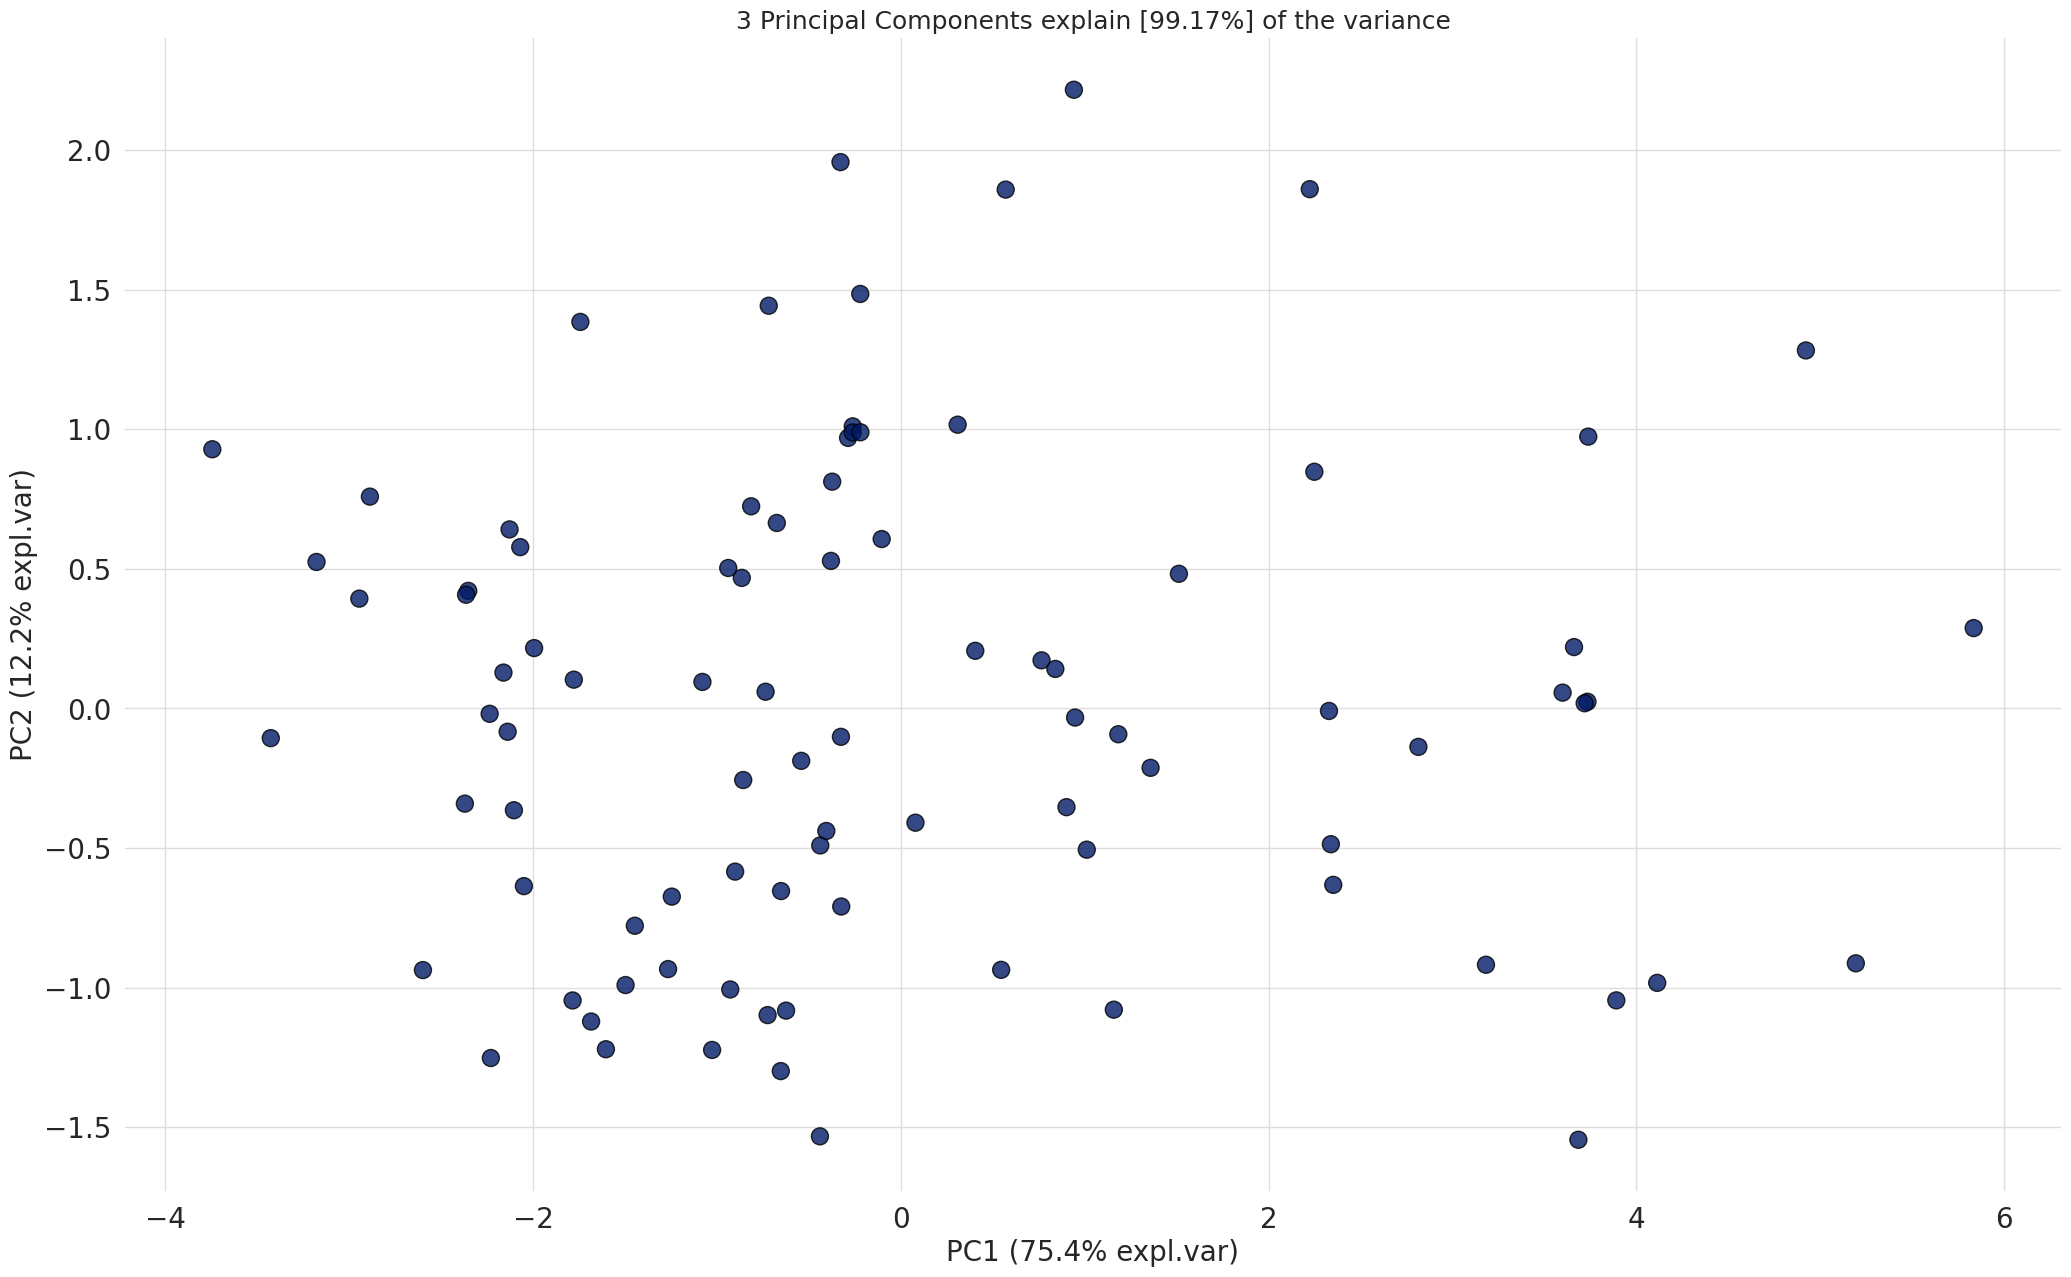

In [30]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [31]:
A = out['loadings'].T
A

PC1       PC2       PC3
Lung nodule masses                              -0.440385  0.248808 -0.109498
Density of nodule                               -0.438623  0.356933 -0.123567
level of carcinoembryonic antigen in blood      -0.415686 -0.360005 -0.414181
Mass of effusion                                -0.457824  0.051725 -0.265473
Density of pleural                              -0.356688  0.300546  0.764220
Level of pro-gastrin-releasing peptide in blood -0.322564 -0.766868  0.382999

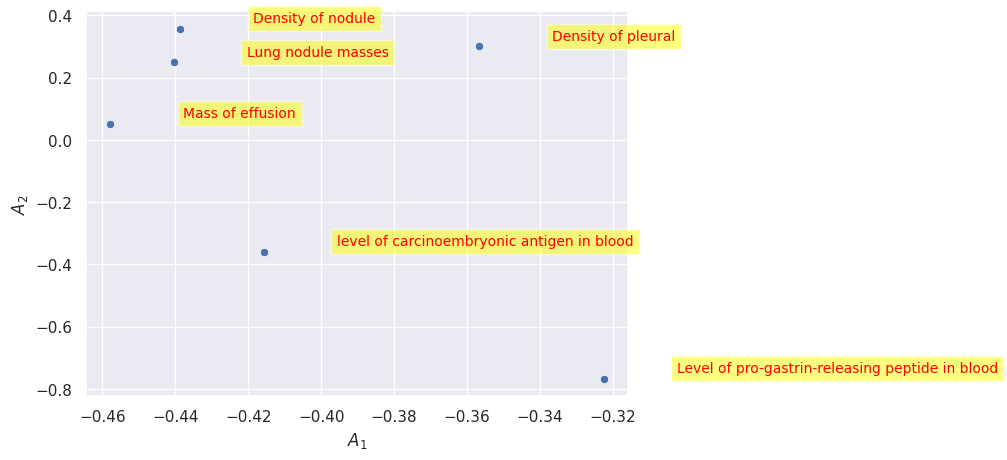

In [32]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

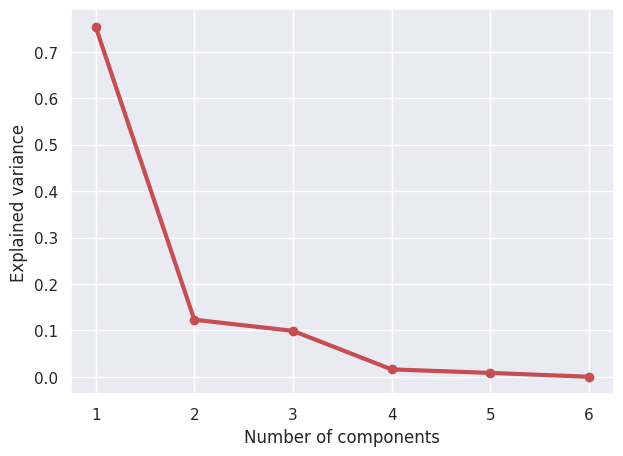

In [33]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

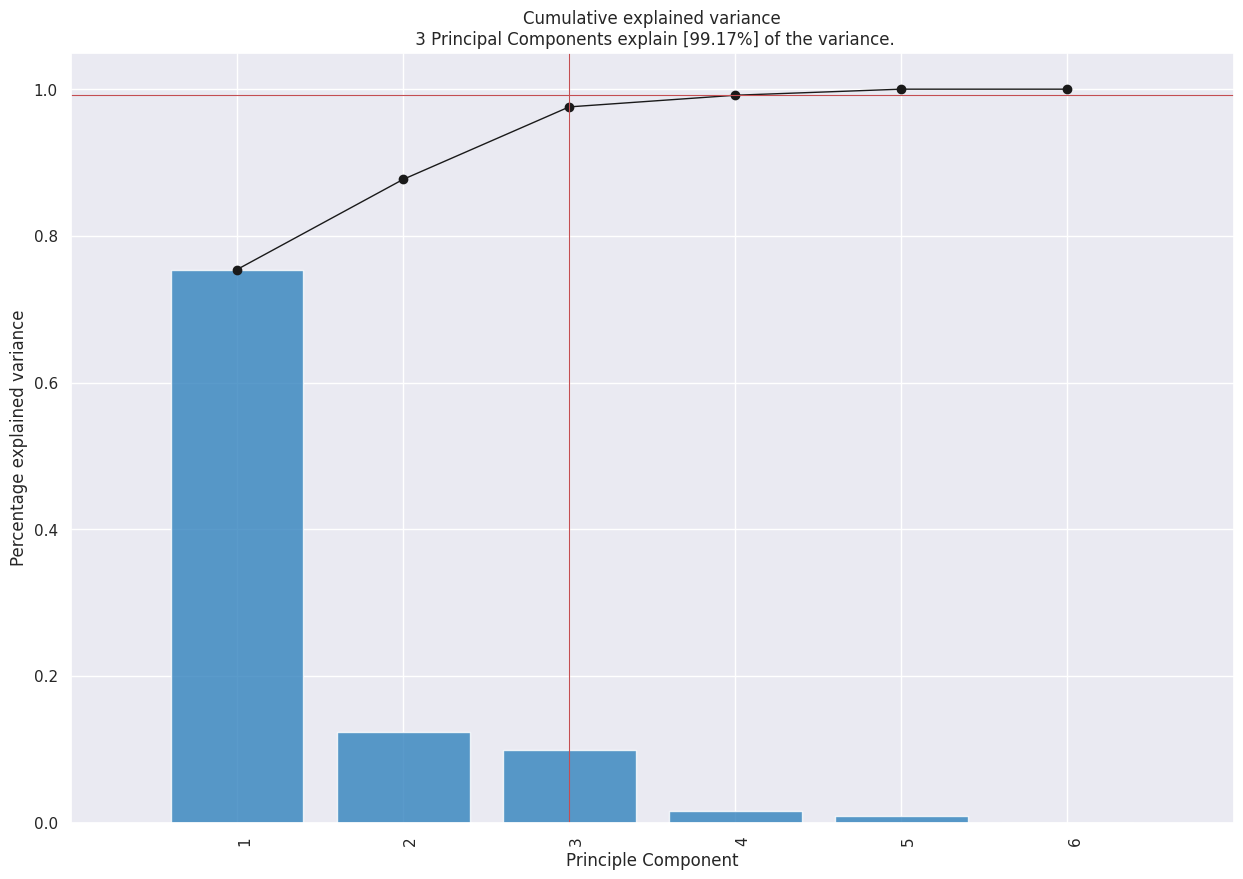

In [34]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (75.4% expl.var)', ylabel='PC2 (12.2% expl.var)'>)

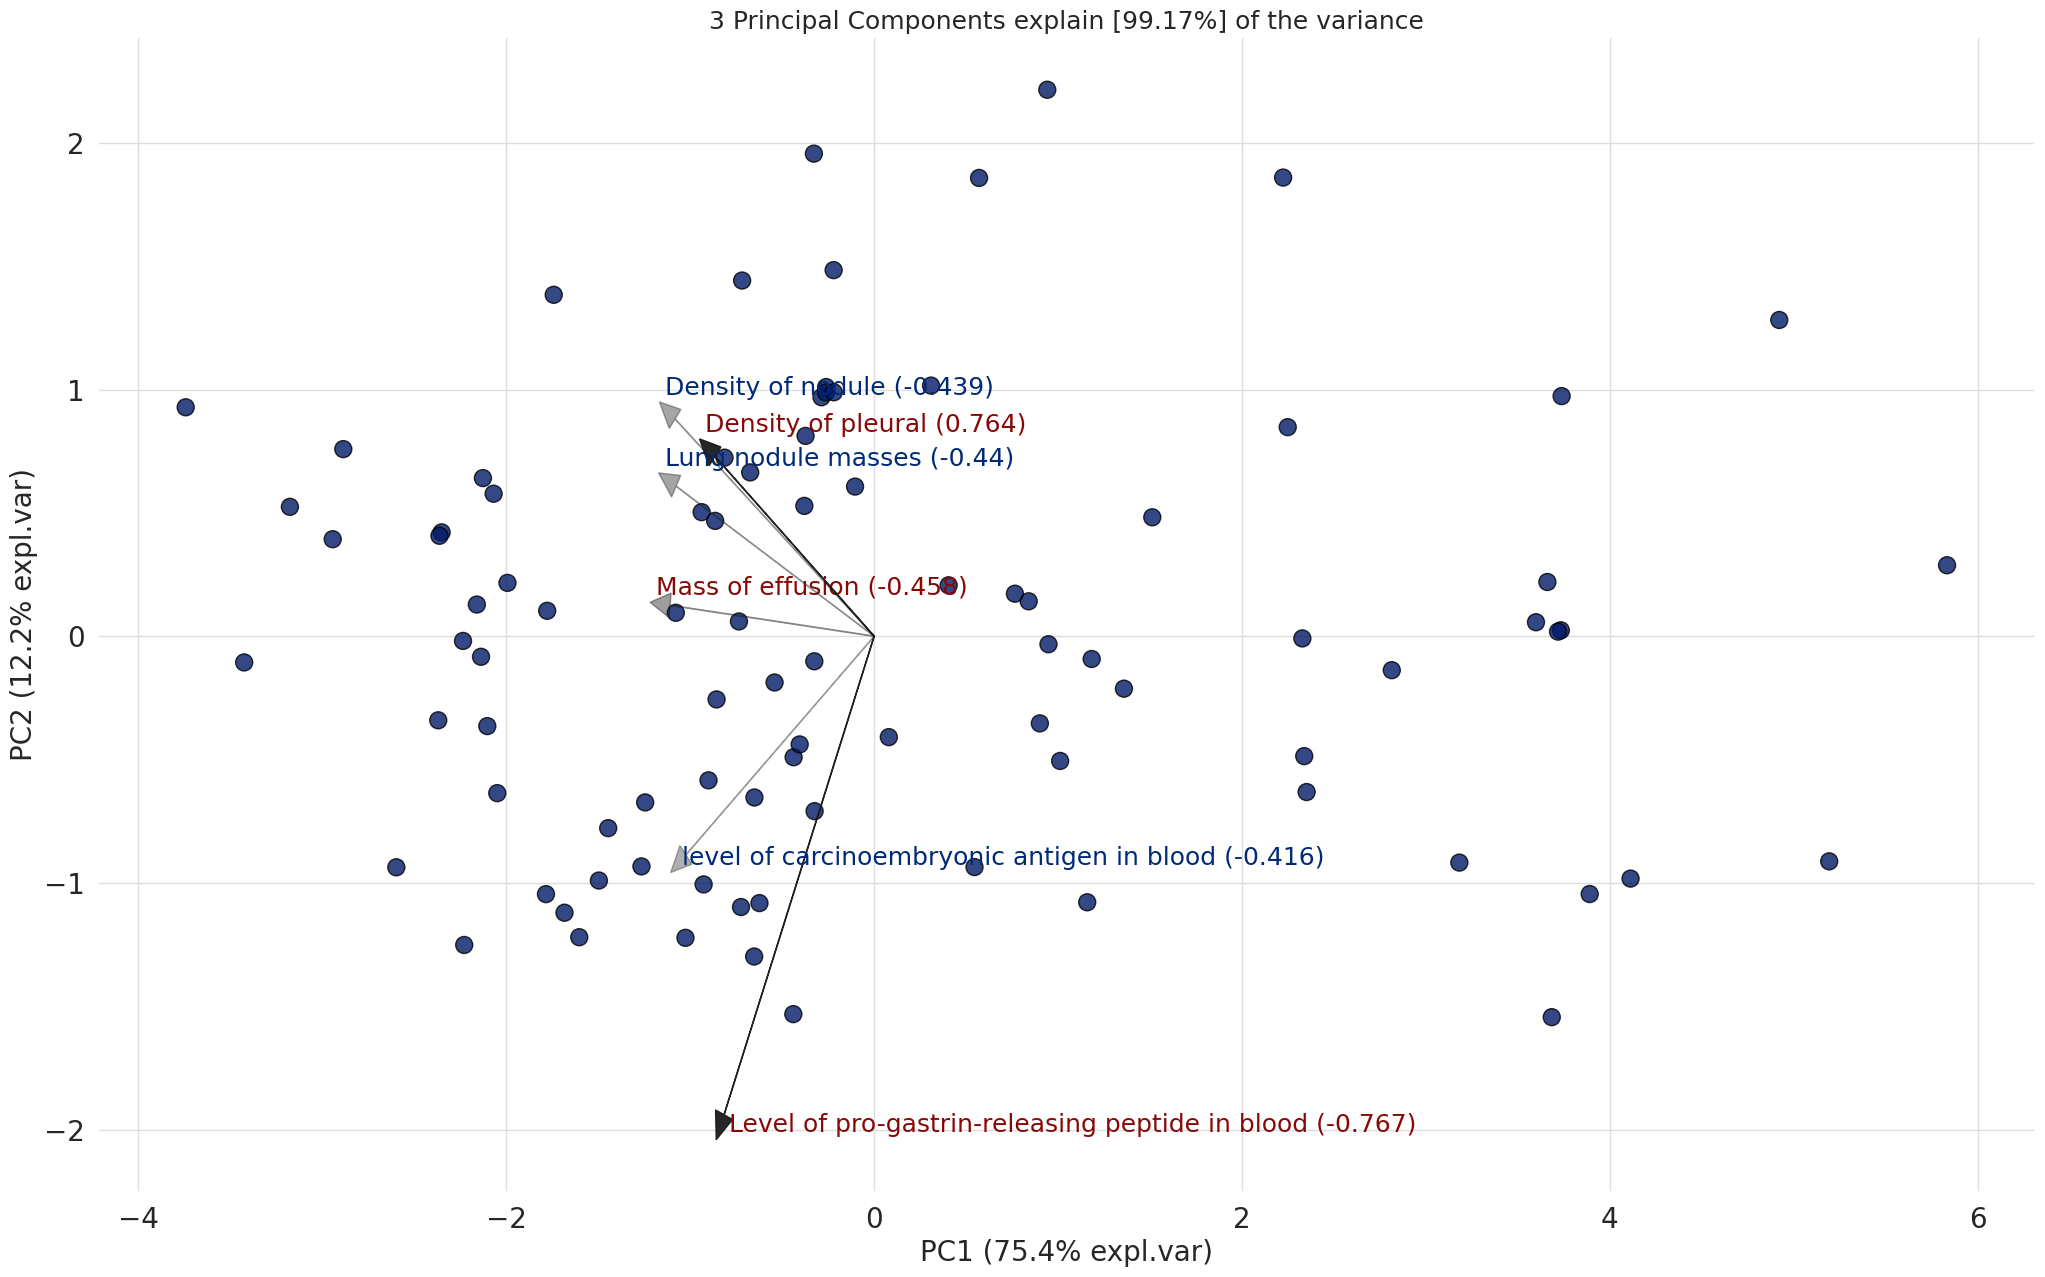

In [35]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (75.4% expl.var)', ylabel='PC2 (12.2% expl.var)', zlabel='PC3 (9.88% expl.var)'>)

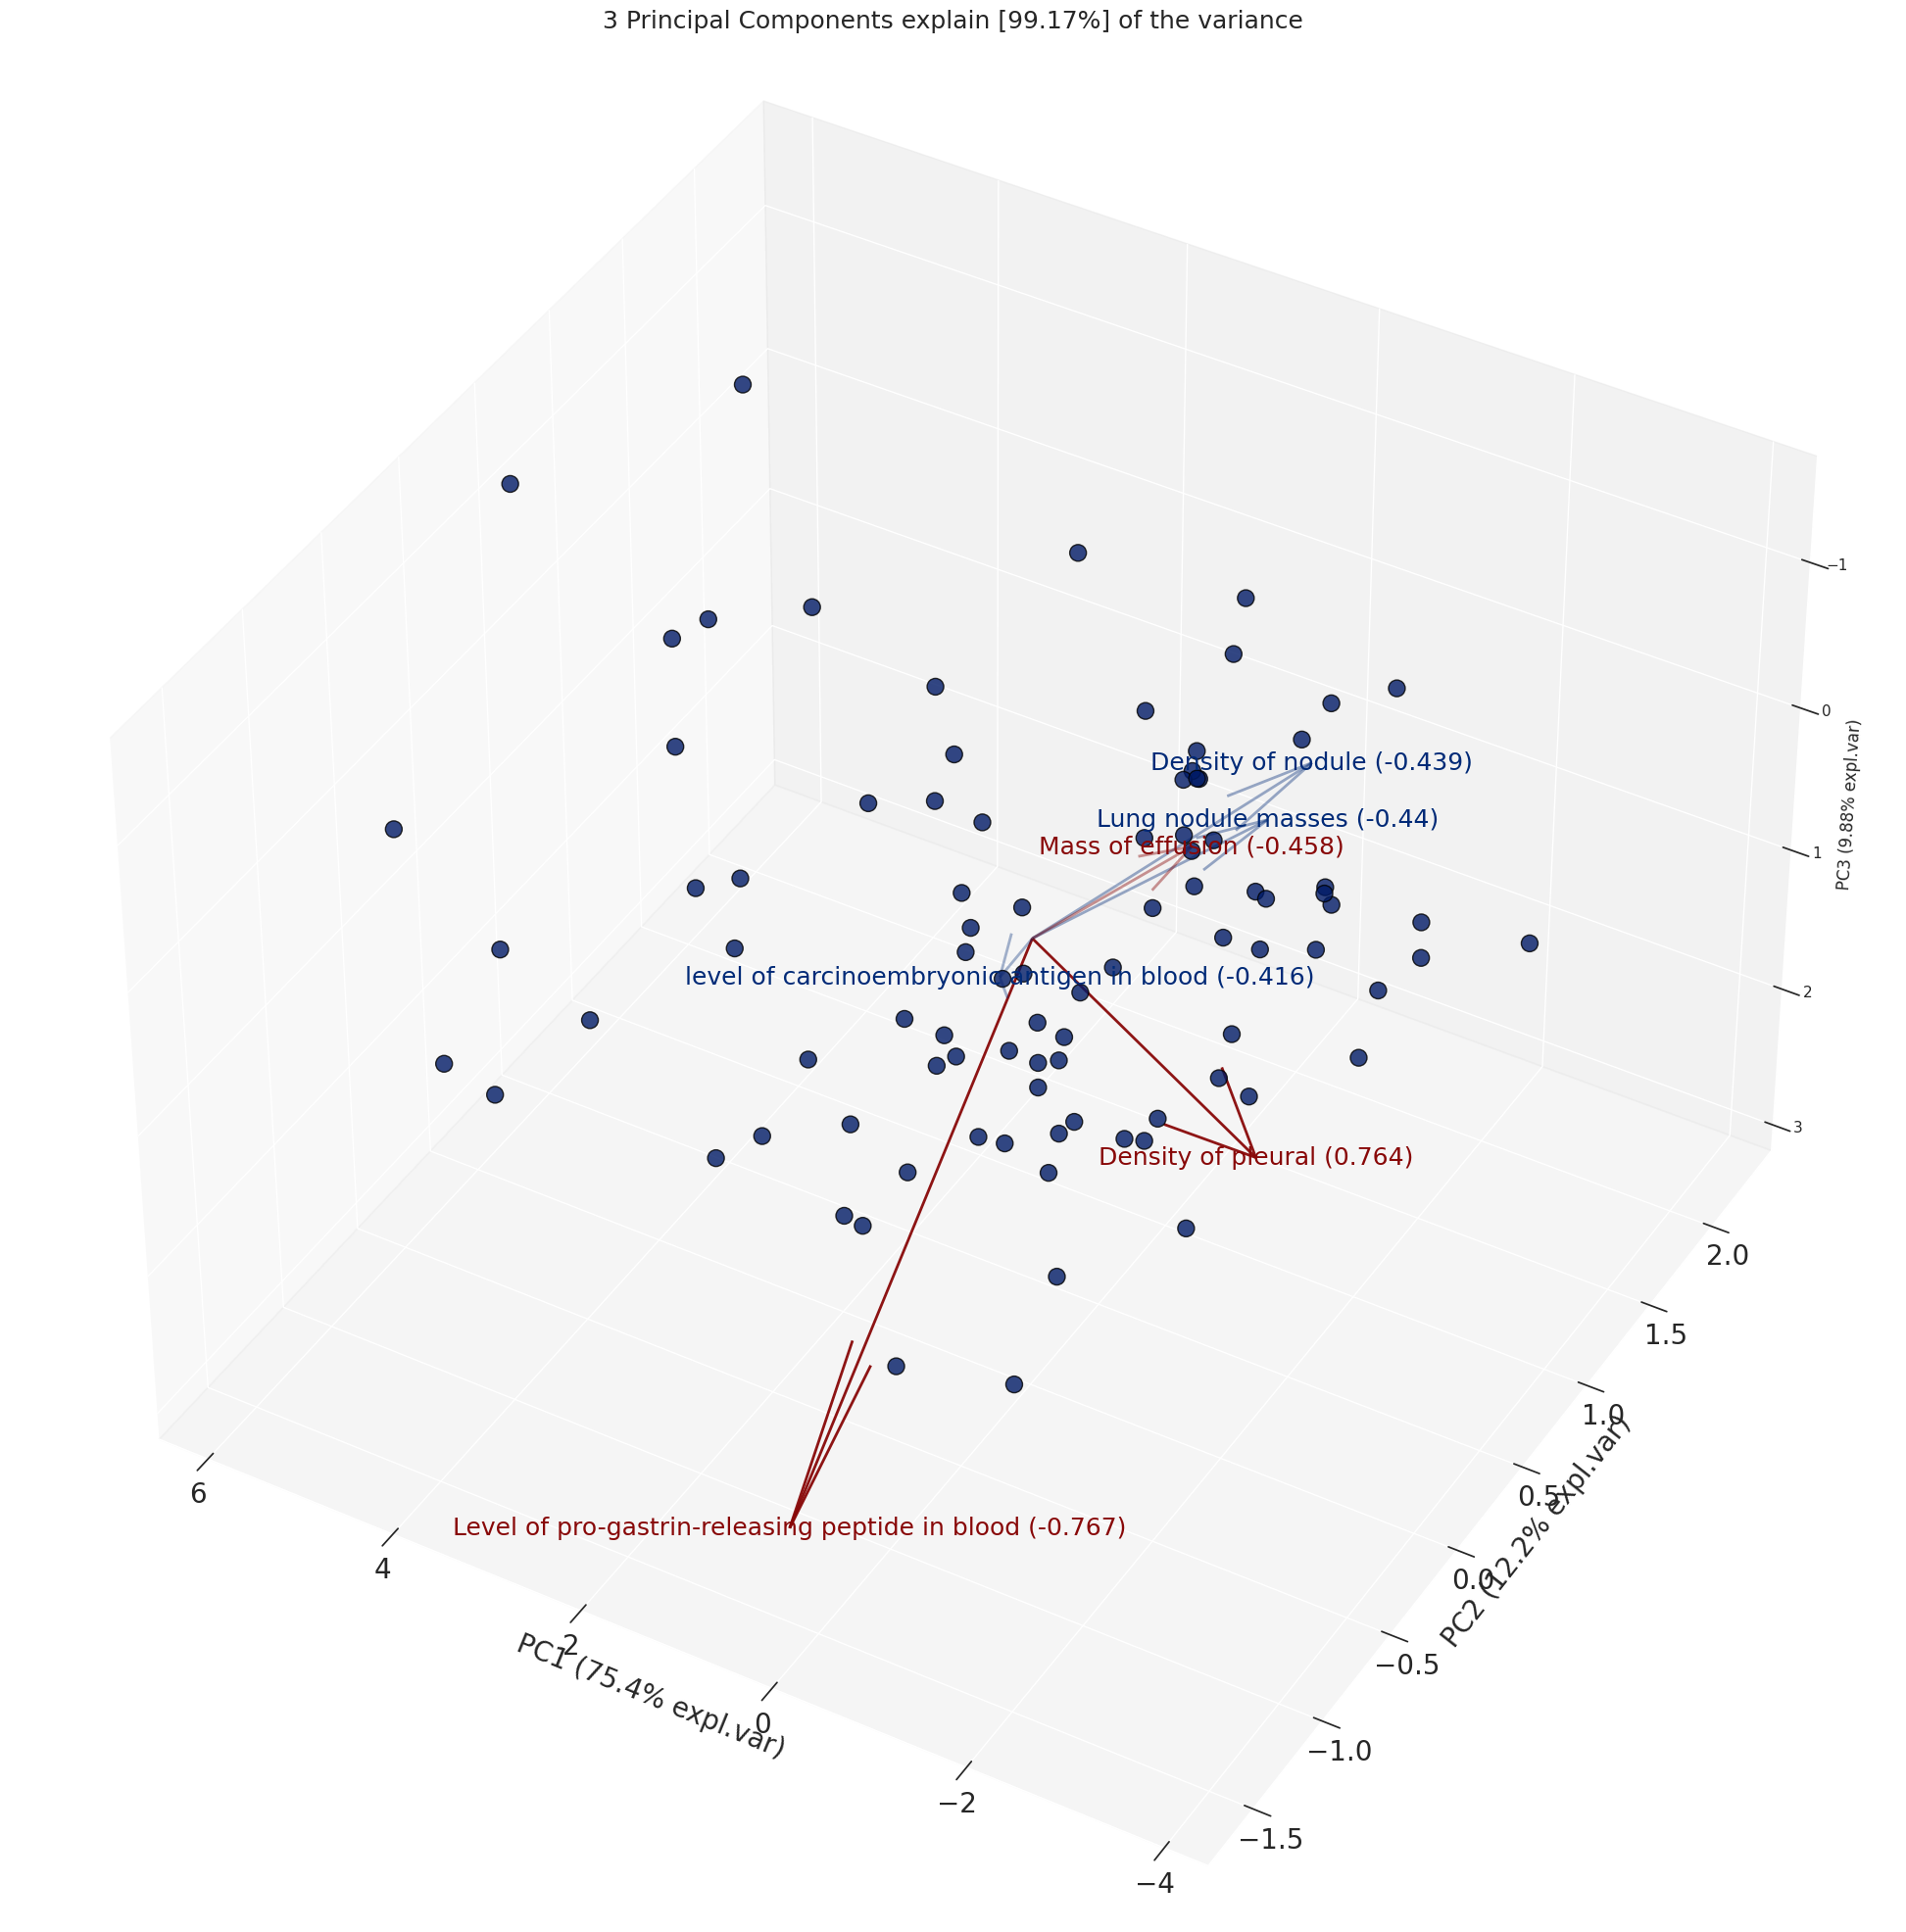

In [36]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [37]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [38]:
#For Google Colab only
from pycaret.utils import enable_colab
enable_colab()

ImportError: ignored

In [39]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (81, 7)
Unseen Data For Predictions: (9, 7)


In [40]:
from pycaret.classification import *
clf = setup(data=data, target='Infected_lung', train_size=0.7, session_id=123)

**Comparing All Models**

In [41]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [42]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

 Create a Model

**Logistic Regresssion**

In [43]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [44]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [46]:
tuned_lr

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [47]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with K-nearest neighbour**

In [48]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [49]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [50]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

**Evaluate model with K-nearest neighbour**

In [51]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [52]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [53]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate QDA Model**

In [54]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.83,
                              store_covariance=False, tol=0.0001)

In [55]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [58]:
clf_pca = setup(data=data, target='Infected_lung', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

# **Comparing Models**

In [59]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [60]:
best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

# **Tune Best Model**

In [61]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [65]:
lightgbm_pca = create_model('lightgbm')
tuned_lightgbm_pca = tune_model(lightgbm_pca)

tuned_lightgbm_pca

evaluate_model(tuned_lightgbm_pca)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [66]:
lda_pca = create_model('lda')
tuned_lda_pca = tune_model(lda_pca)

tuned_lda_pca

evaluate_model(tuned_lda_pca)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [67]:
qda_pca = create_model('qda')
tuned_qda_pca = tune_model(qda_pca)

tuned_qda_pca

evaluate_model(tuned_qda_pca)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Evaluate Best Model**

In [62]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr_pca = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9805  0.9545  0.9130  0.9333  0.8224  0.8238
1       0.8889  0.9610  0.9545  0.8750  0.9130  0.7600  0.7655
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9444  0.9968  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  0.9903  0.9545  0.9130  0.9333  0.8224  0.8238
6       0.9722  0.9968  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.8571  0.9626  0.9048  0.8636  0.8837  0.6988  0.7001
9       0.9429  1.0000  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9300  0.9852  0.9535  0.9349  0.9427  0.8523  0.8565
SD      0.0385  0.0158  0.0472  0.0485  0.0313  0.0817  0.0814

# **Tune Model**

In [63]:
tuned_lr_pca = tune_model(lr_pca)

NameError: ignored

# **Evaluate Model**

In [64]:
tuned_lr_pca

NameError: ignored

In [ ]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create K-nearest neighbour Model**

In [ ]:
knn_pca = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8611  0.9594  0.9545  0.8400  0.8936  0.6959  0.7078
1       0.8889  0.9156  1.0000  0.8462  0.9167  0.7534  0.7774
2       0.8889  0.9383  0.9091  0.9091  0.9091  0.7662  0.7662
3       0.9722  0.9578  1.0000  0.9565  0.9778  0.9408  0.9424
4       0.9444  0.9968  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  0.9854  0.9545  0.9130  0.9333  0.8224  0.8238
6       0.9444  0.9603  1.0000  0.9130  0.9545  0.8835  0.8896
7       0.9444  0.9714  0.9048  1.0000  0.9500  0.8879  0.8935
8       0.8571  0.9269  0.9048  0.8636  0.8837  0.6988  0.7001
9       0.9429  0.9796  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9161  0.9591  0.9537  0.9155  0.9326  0.8213  0.8277
SD      0.0378  0.0246  0.0416  0.0541  0.0290  0.0827  0.0810

# **Tune Model**

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9821  0.9545  0.8750  0.9130  0.7600  0.7655
1       0.9167  0.9188  1.0000  0.8800  0.9362  0.8176  0.8315
2       0.9167  0.9334  0.9545  0.9130  0.9333  0.8224  0.8238
3       0.9722  0.9935  1.0000  0.9565  0.9778  0.9408  0.9424
4       0.8889  1.0000  0.8182  1.0000  0.9000  0.7778  0.7977
5       0.9167  0.9919  0.9545  0.9130  0.9333  0.8224  0.8238
6       0.9722  0.9952  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9722  0.9968  0.9524  1.0000  0.9756  0.9434  0.9449
8       0.8857  0.9524  1.0000  0.8400  0.9130  0.7500  0.7746
9       0.9714  0.9983  1.0000  0.9545  0.9767  0.9398  0.9415
Mean    0.9302  0.9763  0.9634  0.9287  0.9436  0.8516  0.8590
SD      0.0360  0.0285  0.0530  0.0509  0.0290  0.0771  0.0716

In [ ]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

# **Evaluate Model KNN**

In [ ]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9740  1.0000  0.8800  0.9362  0.8176  0.8315
1       0.8611  0.9513  0.9545  0.8400  0.8936  0.6959  0.7078
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       0.9722  1.0000  1.0000  0.9565  0.9778  0.9408  0.9424
4       0.9167  0.9968  0.8636  1.0000  0.9268  0.8312  0.8433
5       0.9167  0.9903  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.9167  0.9937  0.9524  0.9091  0.9302  0.8269  0.8283
7       0.9444  1.0000  0.9048  1.0000  0.9500  0.8879  0.8935
8       0.8571  0.9626  0.9524  0.8333  0.8889  0.6914  0.7035
9       0.9143  0.9898  0.9524  0.9091  0.9302  0.8193  0.8208
Mean    0.9160  0.9823  0.9580  0.9125  0.9326  0.8209  0.8289
SD      0.0336  0.0168  0.0435  0.0556  0.0253  0.0741  0.0714

# **Tune model**

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9805  1.0000  0.8800  0.9362  0.8176  0.8315
1       0.8889  0.9513  1.0000  0.8462  0.9167  0.7534  0.7774
2       0.9167  0.9643  1.0000  0.8800  0.9362  0.8176  0.8315
3       0.9444  1.0000  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9167  1.0000  0.8636  1.0000  0.9268  0.8312  0.8433
5       0.9167  0.9903  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.9444  0.9968  1.0000  0.9130  0.9545  0.8835  0.8896
7       0.9722  1.0000  0.9524  1.0000  0.9756  0.9434  0.9449
8       0.8286  0.9592  0.9524  0.8000  0.8696  0.6250  0.6455
9       0.9143  0.9898  1.0000  0.8750  0.9333  0.8148  0.8292
Mean    0.9160  0.9832  0.9768  0.8991  0.9342  0.8184  0.8311
SD      0.0363  0.0176  0.0422  0.0593  0.0268  0.0809  0.0754

# **Evaluate Model**

In [ ]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9773  0.9545  0.9130  0.9333  0.8224  0.8238
1       0.8889  0.9448  1.0000  0.8462  0.9167  0.7534  0.7774
2       0.8889  0.9416  0.9091  0.9091  0.9091  0.7662  0.7662
3       0.9444  0.9935  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9444  0.9903  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.8889  0.9870  0.9091  0.9091  0.9091  0.7662  0.7662
6       0.9444  0.9921  0.9524  0.9524  0.9524  0.8857  0.8857
7       0.8889  0.9651  0.8571  0.9474  0.9000  0.7757  0.7806
8       0.8857  0.9269  1.0000  0.8400  0.9130  0.7500  0.7746
9       0.9429  0.9898  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9134  0.9708  0.9491  0.9147  0.9297  0.8164  0.8238
SD      0.0263  0.0235  0.0486  0.0448  0.0213  0.0571  0.0540

In [ ]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9444  0.9870  0.9545  0.9545  0.9545  0.8831  0.8831
1       0.8611  0.9643  0.9091  0.8696  0.8889  0.7039  0.7052
2       0.8611  0.9610  0.8636  0.9048  0.8837  0.7115  0.7127
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8889  1.0000  0.8182  1.0000  0.9000  0.7778  0.7977
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9444  0.9968  0.9524  0.9524  0.9524  0.8857  0.8857
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.9429  0.9592  0.9524  0.9524  0.9524  0.8810  0.8810
9       0.9714  1.0000  1.0000  0.9545  0.9767  0.9398  0.9415
Mean    0.9331  0.9868  0.9307  0.9588  0.9432  0.8616  0.8652
SD      0.0483  0.0170  0.0624  0.0422  0.0408  0.1005  0.0985

In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [4]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.6 MB/s eta 0:00:00


In [5]:
import shap

In [7]:
interpret_model(tuned_et_pca, plot='summary')


NameError: ignored

In [8]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

NameError: ignored

In [9]:
interpret_model(tuned_et_pca, plot='reason')

NameError: ignored